# Where The Trend Is With You - The Second Power-Play Price Pattern

In [1]:
from pandas_datareader import data  
from datetime import datetime
import pandas_datareader as pdr
import pandas as pd
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## Nasdaq 100 Futures from late 2020 to early 2021

In [2]:
start = datetime(2020,9,1)
end = datetime(2021,2,1)
# NASDAQ FUTURES
df = pdr.get_data_yahoo('NQ=F', start, end)

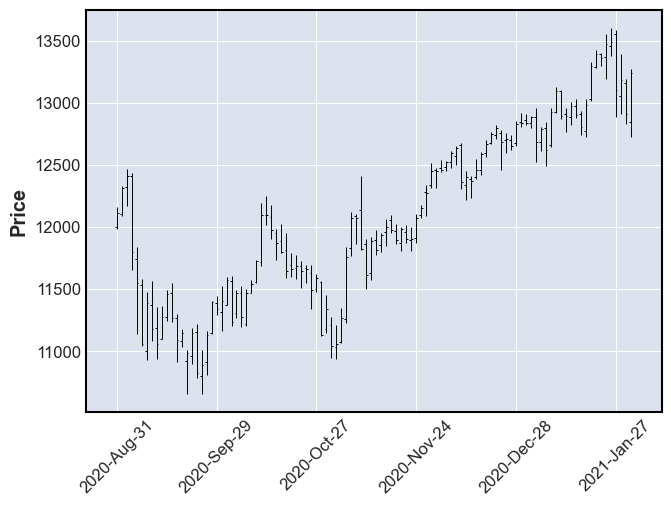

In [3]:
mpf.plot(df)

## Close position in range

In [4]:
df['pos'] = (df['Close'] - df['Low']) / (df['High'] - df['Low']) * 100

## Almost all market highs can be found to occur at or shortly after a market closes right on the high of the day

In [5]:
df['pos_high'] = np.NaN
df['pos_high'].loc[df.loc[df[df['pos'] > 90].index, 'pos'].dropna().index] = df['Close']

## Almost all market lows can be found at or shortly after a market closes right on the low of the day

In [6]:
df['pos_low'] = np.NaN
df['pos_low'].loc[df.loc[df[df['pos'] < 10].index, 'pos'].dropna().index] = df['Close']

In [7]:
apds = [
    mpf.make_addplot(df['pos_low'], color='red', marker='^', scatter=True),
    mpf.make_addplot(df['pos_high'], color='blue', marker='v', scatter=True)
]

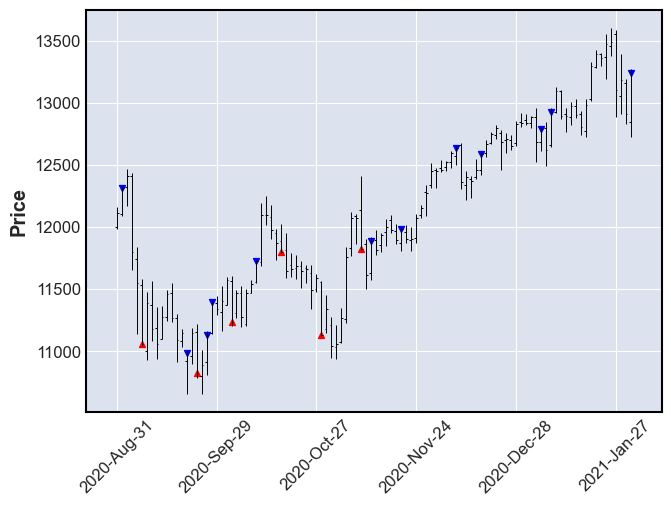

In [8]:
mpf.plot(df, addplot=apds)